<a href="https://colab.research.google.com/github/luhe-li/confidence/blob/main/simBimodalv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
def simResp_CI(pCommon, nT, sA, sV, aA, bA, sigA, sigV, muP, sigP):

    # 3 decision strategies (1. averaging, 2. selection, 3. matching)
    # 2 modalities (1. auditory, 2. visual)
    # num_trials
    r = np.full((3, 2, nT), np.nan)

    mA = np.random.randn(nT) * sigA + (sA * aA + bA)
    mV = np.random.randn(nT) * sigV + sV

    JA = sigA**2
    JV = sigV**2
    JP = sigP**2
    const1 = JA*JV + JA*JP + JV*JP
    constA = JA + JP
    constV = JV + JP

    L_C1 = 1/(2*np.pi*np.sqrt(const1)) * np.exp(-0.5 * ((mA - mV)**2 * JP + (mV - muP)**2 * JA + (mA - muP)**2 * JV) / const1)
    L_C2 = 1/(2*np.pi*np.sqrt(constA*constV)) * np.exp(-0.5 * (mA - muP)**2 / constA + (mV - muP)**2 / constV)

    post_C1 = pCommon * L_C1 / (pCommon * L_C1 + (1 - pCommon) * L_C2)
    post_C2 = 1 - post_C1

    # import pdb; pdb.set_trace()

    shat_C1 = (mA/JA + mV/JV + muP/JP) / (1/JV + 1/JA + 1/JP)
    shat_A_C2 = (mA/JA + muP/JP) / (1/JA + 1/JP)
    shat_V_C2 = (mV/JV + muP/JP) / (1/JV + 1/JP)

    r[0, 0, :] = post_C1 * shat_C1 + post_C2 * shat_A_C2
    r[0, 1, :] = post_C1 * shat_C1 + post_C2 * shat_V_C2

    return r, post_C1, constA, constV, const1

# Simulate auditory localization responses

In [ ]:
# Definitions
numA = 16
sA = np.linspace(-30, 30, numA)
sV = sA
sAV = np.array(list(product(sA, sV)))  # Equivalent to MATLAB's combvec
num_s = sAV.shape[0]
num_trial = 100

# Set free parameters
aA = 1
bA = 0
sigma_A = 10
sigma_V = 2.5
mu_P = 0
sigma_P = 33
p_common = 0.57

# Decision strategies
ds = ['model averaging', 'model selection', 'probability matching']
nDS = len(ds)

# Initializing the response array
resp = np.full((num_s, len(ds), 2, num_trial), np.nan)
post_C1 = np.full((num_s, num_trial), np.nan)
constA = np.full((num_s), np.nan)
constV = np.full((num_s), np.nan)
const1 = np.full((num_s), np.nan)

# Simulate response and latent variables
for i in range(num_s):
    resp[i], post_C1[i], constA[i], constV[i], const1[i] = simResp_CI(p_common, num_trial, sAV[i, 0], sAV[i, 1], aA, bA, sigma_A, sigma_V, mu_P, sigma_P)

# Plotting
d = 0  # index for 'model averaging'
m = 0  # index for 'auditory'

# Look for metamer trials
a_resp = resp[:, d, m, :]
a_resp_1d = np.reshape(a_resp, -1)
a_resp_3d = np.reshape(a_resp,(numA, numA, num_trial))
center_idx = numA//2
standard = a_resp_3d[center_idx, center_idx, 1]
meta_bool = np.isclose(a_resp_1d, standard, atol = 0.1)
meta_idx = np.where(meta_bool)

# Find out the discrepancy for each metamer trial
meta_bool_3d = np.reshape(meta_bool, (numA, numA, num_trial))
rows, cols, pages = np.where(meta_bool_3d)
delta = sA[rows] - sV[cols]


# Compare models for perceptual uncertainty
Vary visual uncertainty, plot perceptual confidence of visual and auditory localization in bimodal trials
- Full-access model: observer has the access to the uncertainty of intermediate etsimates, and uses the posterior of common cause to choose between them.
- Partial-acess model: observer only has access to the distribution of the final estimate, and uses the dispersion of it to estimate the

Number of metamer trials: 90
Number of metamer trials: 74
Number of metamer trials: 86
Number of metamer trials: 69
Number of metamer trials: 90
Number of metamer trials: 89
Number of metamer trials: 100
Number of metamer trials: 94
Number of metamer trials: 98
Number of metamer trials: 88


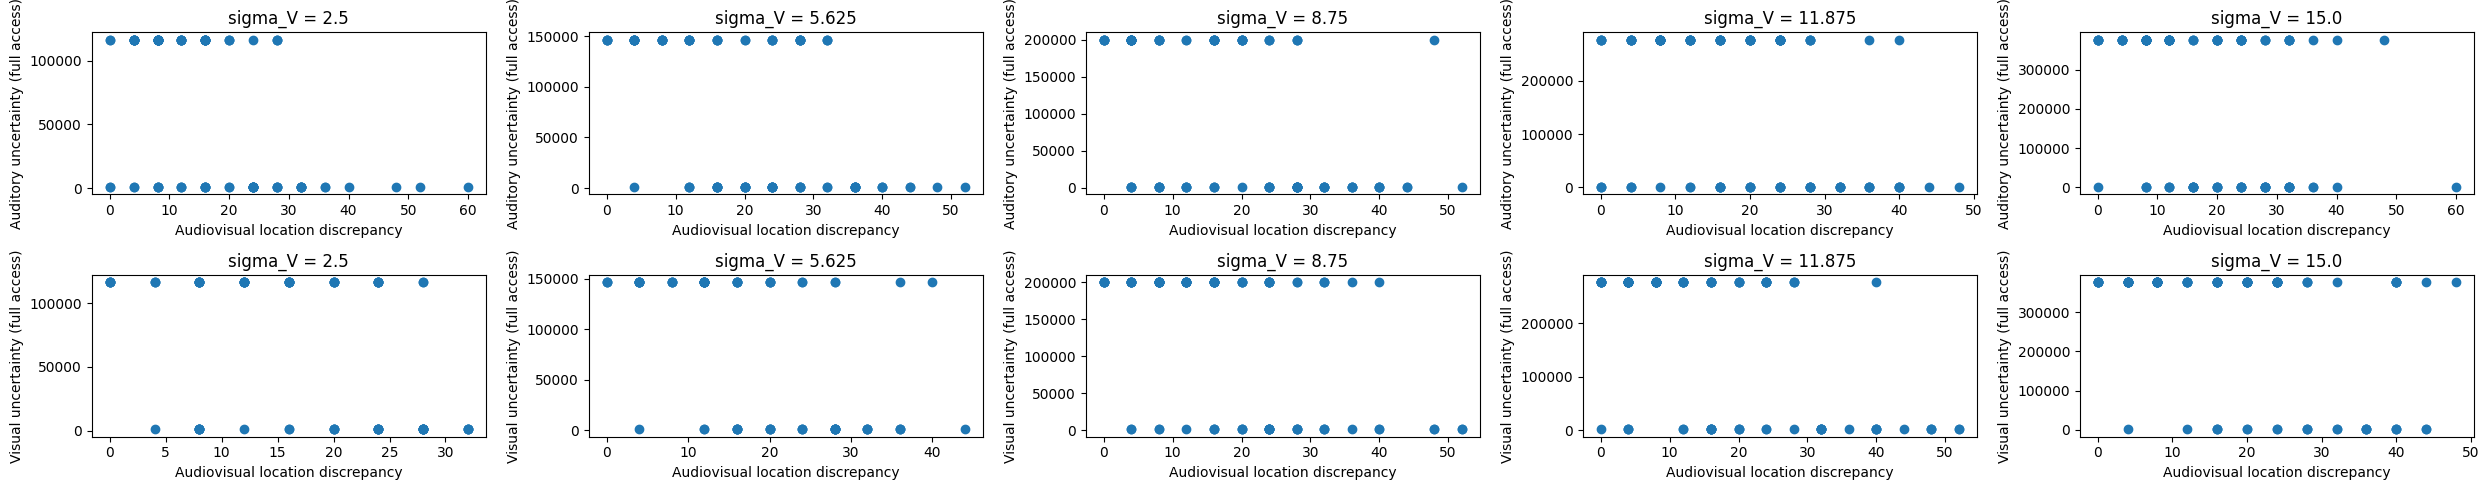

In [ ]:
sigma_Vs = np.linspace(2.5, 15, 5)
num_plots = len(sigma_Vs)

plt.figure(figsize=(5 * num_plots, 5))  # Adjust the figure size as needed

for idx, sigma_V in enumerate(sigma_Vs):

  # Initializing the response array
  resp = np.full((num_s, len(ds), 2, num_trial), np.nan)
  post_C1 = np.full((num_s, num_trial), np.nan)
  constA = np.full((num_s), np.nan)
  constV = np.full((num_s), np.nan)
  const1 = np.full((num_s), np.nan)

  # Simulate response and latent variables
  for i in range(num_s):
      resp[i], post_C1[i], constA[i],\
       constV[i], const1[i] = \
       simResp_CI(p_common, num_trial, sAV[i, 0], sAV[i, 1],\
                  aA, bA, sigma_A, sigma_V, mu_P, sigma_P)

  # Repmat noise-free variables across trials
  constA_1d = np.tile(constA, num_trial)
  constV_1d = np.tile(constV, num_trial)
  const1_1d = np.tile(const1, num_trial)


  ######### auditory uncertianty
  d = 0  # index for 'model averaging'
  m = 0  # index for 'auditory'

  # Look for metamer trials
  a_resp = resp[:, d, m, :]
  a_resp_1d = np.reshape(a_resp, -1)
  a_resp_3d = np.reshape(a_resp,(numA, numA, num_trial))
  center_idx = numA//2
  standard = a_resp_3d[center_idx, center_idx, 1]
  meta_bool = np.isclose(a_resp_1d, standard, atol = 0.1)
  num_meta = sum(meta_bool)
  print("Number of metamer trials:", num_meta)

  # Find out the discrepancy for each metamer trial
  meta_bool_3d = np.reshape(meta_bool, (numA, numA, num_trial))
  rows, cols, pages = np.where(meta_bool_3d)
  delta = np.abs(sA[rows] - sV[cols])

  ## Full-access model
  # Initialize perceptual uncertainty for metamer trials
  pu = np.zeros_like(delta)
  meta_post_c1 = np.reshape(post_C1, -1)[meta_bool]
  meta_constA = constA_1d[meta_bool]
  meta_const1 = const1_1d[meta_bool]
  for i in range(len(meta_post_c1)):
    if meta_post_c1[i] < 0.5:
      pu[i] = meta_constA[i]
    else:
      pu[i] = meta_const1[i]

  plt.subplot(2, num_plots, idx + 1)
  plt.plot(delta, pu,'o')
  plt.xlabel('Audiovisual location discrepancy')
  plt.ylabel('Auditory uncertainty (full access)')
  plt.title(f'sigma_V = {sigma_V}')  # Title for each subplot
  # plt.ylim(0, 1)


  ######### visual uncertianty
  d = 0  # index for 'model averaging'
  m = 1  # index for 'visual'

  # Look for metamer trials
  v_resp = resp[:, d, m, :]
  v_resp_1d = np.reshape(v_resp, -1)
  v_resp_3d = np.reshape(v_resp,(numA, numA, num_trial))
  center_idx = numA//2
  standard = v_resp_3d[center_idx, center_idx, 1]
  meta_bool = np.isclose(v_resp_1d, standard, atol = 0.1)
  num_meta = sum(meta_bool)
  print("Number of metamer trials:", num_meta)

  # Find out the discrepancy for each metamer trial
  meta_bool_3d = np.reshape(meta_bool, (numA, numA, num_trial))
  rows, cols, pages = np.where(meta_bool_3d)
  delta = np.abs(sA[rows] - sV[cols])

  ## Full-access model
  # Initialize perceptual uncertainty for metamer trials
  pu = np.zeros_like(delta)
  meta_post_c1 = np.reshape(post_C1, -1)[meta_bool]
  meta_constV = constV_1d[meta_bool]
  meta_const1 = const1_1d[meta_bool]
  for i in range(len(meta_post_c1)):
    if meta_post_c1[i] < 0.5:
      pu[i] = meta_constV[i]
    else:
      pu[i] = meta_const1[i]

  plt.subplot(2, num_plots, idx + 1 + num_plots)
  plt.plot(delta, pu,'o')
  plt.xlabel('Audiovisual location discrepancy')
  plt.ylabel('Visual uncertainty (full access)')
  plt.title(f'sigma_V = {sigma_V}')  # Title for each subplot

plt.tight_layout()
plt.show()

Simulate posterior of the final estimate of auditory location, use its dispersion as the perceptual confidence proxy. Use the posterior of common cause as the proxy for causal uncertainty. Compare perceptual confidence between congruent vs. incongruent trials.
- For a standard congruent audiovisual location pair, find out five incongruent trials with increasing discrepancy
- Visualize perceptual and causal uncertainty


In [ ]:
con_trial = (numA//2, numA//2)
est = a_resp[con_trial]
incon_trial  = np.isclose(a_resp, est, atol = 0.1)
# incon_trial = incon_trial & (a_resp != est)
rows, cols = np.where(incon_trial)
x_incon_trial = sA[rows]
y_incon_trial = sV[cols]

In [ ]:
print(x_incon_trial)
print(y_incon_trial)

[0. 0. 0. 2. 4. 4.]
[-26.   0.  26. -24. -24. -20.]


In [ ]:
meta_a_resp = np.full((num_s, len(ds), 2, num_trial), np.nan)
post_C1 = np.full((len(rows), num_trial), np.nan)
constA = np.full((len(rows)), np.nan)

for i in range(len(rows)):
  meta_a_resp[i], post_C1[i], constA[i]  = simResp_CI(p_common, num_trial, sA[[rows[i]]], sV[cols[i]], aA, bA, sigma_A, sigma_V, mu_P, sigma_P)

delta = np.abs(x_incon_trial - y_incon_trial)

plt.figure
plt.errorbar(delta, np.mean(post_C1, axis = 1), yerr = np.std(post_C1, axis = 1), fmt='o', capsize=5)
plt.xlabel('Audiovisual location discrepancy')
plt.ylabel('Posterior of common-cause')
plt.show()


Vary visual reliability, plot causal uncertainty

In [ ]:
sigma_Vs = np.linspace(2.5, 15, 5)
num_plots = len(sigma_Vs)

plt.figure(figsize=(5 * num_plots, 5))  # Adjust the figure size as needed

for idx, sigma_V in enumerate(sigma_Vs):

  bimResp = np.full((num_s, len(ds), 2, num_trial), np.nan)

  for i in range(num_s):
    bimResp[i], post_C1[i], constA[i] = simResp_CI(p_common, num_trial, sAV[i, 0], sAV[i, 1], aA, bA, sigma_A, sigma_V, mu_P, sigma_P)

  d = 0  # index for 'model averaging'
  m = 0  # index for 'auditory'

  a_resp = bimResp[:, d, m, :]
  a_resp = mean_a_resp.reshape(numA, numA)

  con_trial = (numA//2, numA//2)
  est = a_resp[con_trial]
  incon_trial  = np.isclose(a_resp, est, atol = 0.2)
  # incon_trial = incon_trial & (a_resp != est)
  rows, cols = np.where(incon_trial)
  x_incon_trial = sA[rows]
  y_incon_trial = sV[cols]

  post_C1 = np.full((len(rows), num_trial), np.nan)
  constA = np.full((len(rows)), np.nan)

  for i in range(len(rows)):
    _, post_C1[i], constA[i]  = simResp_CI(p_common, num_trial, sA[[rows[i]]], sV[cols[i]], aA, bA, sigma_A, sigma_V, mu_P, sigma_P)

  delta = np.abs(x_incon_trial - y_incon_trial)

  plt.subplot(1, num_plots, idx + 1)
  plt.errorbar(delta, np.mean(post_C1, axis=1), yerr=np.std(post_C1, axis=1), fmt='o', capsize=5)
  plt.xlabel('Audiovisual location discrepancy')
  plt.ylabel('Posterior of common-cause')
  plt.title(f'Sigma_V = {sigma_V}')  # Title for each subplot
  plt.ylim(0, 1)

plt.tight_layout()
plt.show()

IndentationError: unexpected indent (<ipython-input-1-93f3196e8381>, line 8)

In [ ]:
sigma_Vs = np.linspace(2.5, 15, 5)
num_plots = len(sigma_Vs)

plt.figure(figsize=(5 * num_plots, 5))  # Adjust the figure size as needed

for idx, sigma_V in enumerate(sigma_Vs):

  bimResp = np.full((num_s, len(ds), 2, num_trial), np.nan)

  for i in range(num_s):
    bimResp[i], post_C1[i], constA[i] = simResp_CI(p_common, num_trial, sAV[i, 0], sAV[i, 1], aA, bA, sigma_A, sigma_V, mu_P, sigma_P)

  d = 0  # index for 'model averaging'
  m = 0  # index for 'auditory'

  a_resp = bimResp[:, d, m, :]
  a_resp = mean_a_resp.reshape(numA, numA)

  con_trial = (numA//2, numA//2)
  est = a_resp[con_trial]
  incon_trial  = np.isclose(a_resp, est, atol = 0.2)
  # incon_trial = incon_trial & (a_resp != est)
  rows, cols = np.where(incon_trial)
  x_incon_trial = sA[rows]
  y_incon_trial = sV[cols]

  post_C1 = np.full((len(rows), num_trial), np.nan)
  constA = np.full((len(rows)), np.nan)

  for i in range(len(rows)):
    _, post_C1[i], constA[i]  = simResp_CI(p_common, num_trial, sA[[rows[i]]], sV[cols[i]], aA, bA, sigma_A, sigma_V, mu_P, sigma_P)

  delta = np.abs(x_incon_trial - y_incon_trial)

  plt.subplot(1, num_plots, idx + 1)
  plt.errorbar(delta, np.mean(post_C1, axis=1), yerr=np.std(post_C1, axis=1), fmt='o', capsize=5)
  plt.xlabel('Audiovisual location discrepancy')
  plt.ylabel('Posterior of common-cause')
  plt.title(f'Sigma_V = {sigma_V}')  # Title for each subplot
  plt.ylim(0, 1)

plt.tight_layout()
plt.show()